In [110]:
# Note that we only have very basic dependencies
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [111]:
# Our dataset
dataset = []

# Where to start the X's
x_runner = -4.0
increment = 0.04

# Generate the dataset, we're going to learn the cos(x) function
for i in range(200):
    dataset.append([x_runner, math.cos(x_runner)])
    x_runner += increment

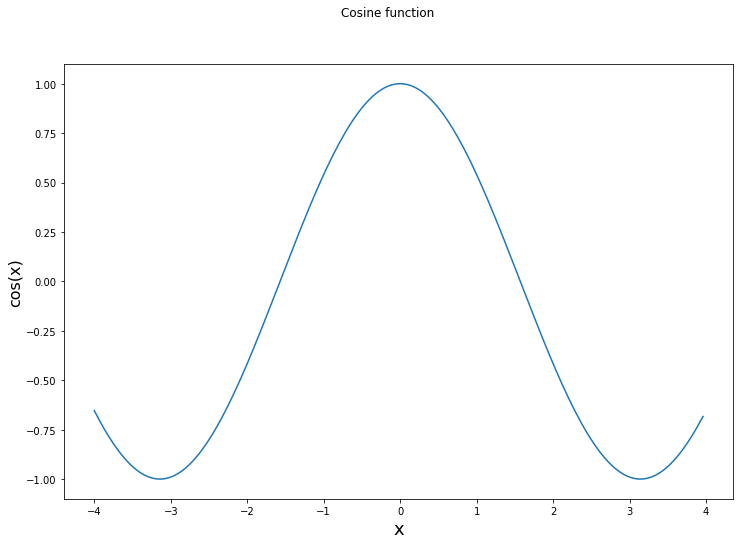

In [112]:
# Plot the whole dataset
fig = plt.figure(figsize=(12, 8))
plt.plot(list(item[0] for item in dataset), list(item[1] for item in dataset))
fig.suptitle('Cosine function')
plt.xlabel('x', fontsize=18)
plt.ylabel('cos(x)', fontsize=16)
plt.show()


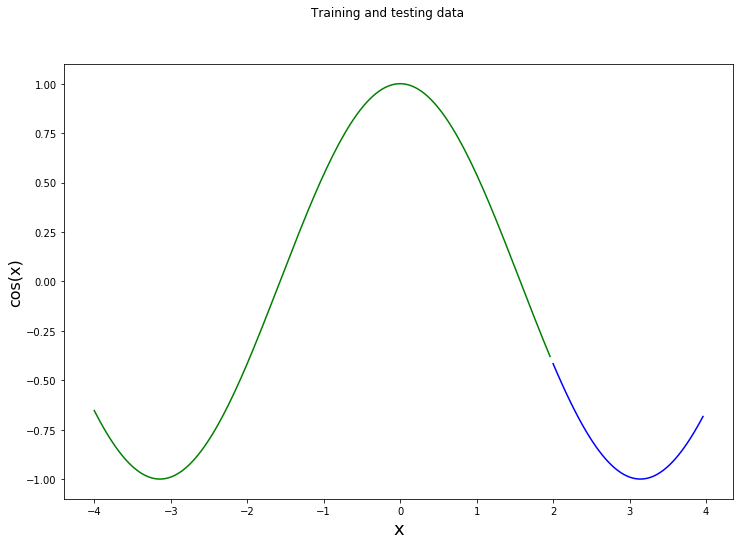

In [113]:
# Split into training and testing sets
training_dataset = dataset[:150]
testing_dataset = dataset[-50:]
# Training inputs
x_training = list(item[0] for item in training_dataset)
# Training outputs
y_training = list(item[1] for item in training_dataset)
# Testing inputs
x_testing = list(item[0] for item in testing_dataset)
# Testing outputs
y_testing = list(item[1] for item in testing_dataset)

# Plot training and testing datasets
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Training and testing data')
plt.plot(x_training, y_training, color='green')
plt.plot(x_testing, y_testing, color='blue')
plt.xlabel('x', fontsize=18)
plt.ylabel('cos(x)', fontsize=16)
plt.show()


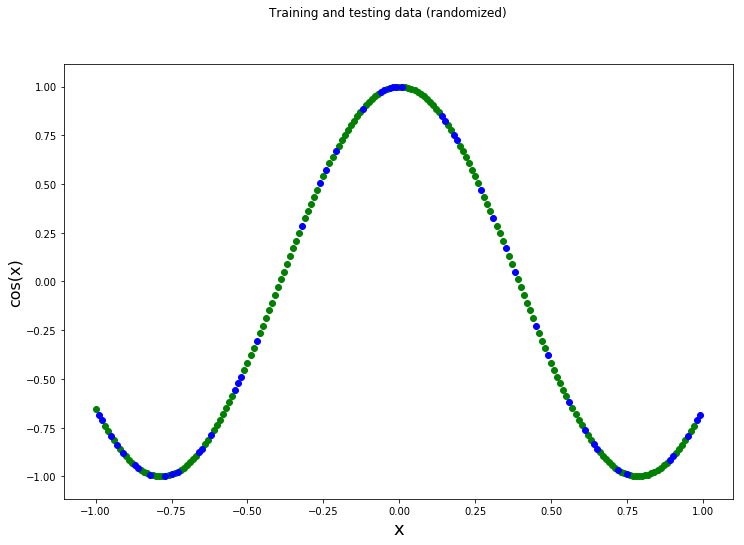

In [114]:
# Shuffle the dataset to make the training and testing sets more evenly distributed
random.shuffle(dataset)

# Redo the split
# Split into training and testing sets
training_dataset = dataset[:150]
testing_dataset = dataset[-50:]
# Training inputs
x_training = list(item[0] for item in training_dataset)
# Training outputs
y_training = list(item[1] for item in training_dataset)
# Testing inputs
x_testing = list(item[0] for item in testing_dataset)
# Testing outputs
y_testing = list(item[1] for item in testing_dataset)

# Normalize X values
for i in range(len(x_training)):
    x_training[i] = x_training[i] / (200*increment - 100*increment)

for i in range(len(x_testing)):
    x_testing[i] = x_testing[i] / (200*increment - 100*increment)


# Plot training and testing datasets
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Training and testing data (randomized)')
plt.scatter(x_training, y_training, color='green')
plt.scatter(x_testing, y_testing, color='blue')
plt.xlabel('x', fontsize=18)
plt.ylabel('cos(x)', fontsize=16)
plt.show()


In [115]:
## Since we're going to be using a genetic algorithm, we need something that will give us a randomly initialized neural network with the structure we want. We will assume one hidden layer.
def produce_neural_network(inputs_size, hidden_layer_size, outputs_size, randomize = True):
    net = {}
    net['inputs_size'] = inputs_size
    net['hidden_size'] = hidden_layer_size
    net['outputs_size'] = outputs_size
    if randomize:
        net['weights_in'] = np.subtract(np.random.rand(inputs_size*hidden_layer_size)*5, 2.5)
        net['weights_out'] = np.subtract(np.random.rand(hidden_layer_size * outputs_size)*5, 2.5)
    net['biases'] = np.subtract(np.random.rand(hidden_layer_size)*5, 2.5)
    return net

In [116]:
# And we need a way to run that neural network on inputs to generate outputs
def run_neural_network(x, net):
    if len(x) <> net['inputs_size']:
        raise Exception('Input dimensions do not match network structure')    
    hidden_layer = np.add(np.multiply(x, net['weights_in']), net['biases'])
    # Now for RELU activation
    hidden_layer = hidden_layer * (hidden_layer > 0)
    output_layer = np.matmul( np.matrix([hidden_layer]), np.matrix([net['weights_out']]).T)
    return output_layer

In [128]:
# Genetic algorithm function: As we'll see in a little bit, we need a way to "breed" arrays
def breed_arrays(mother, father, crossover, mutation):
    if len(mother) <> len(father):
        raise Exception('Incompatible parents')
    child = []
    for i in range(len(mother)):
        crossover_decider = random.random()
        childvalue = 0
        if crossover_decider < crossover:
            childvalue = mother[i]
        else:
            childvalue = father[i]
        mutation_decider = random.random()
        if mutation_decider < mutation:
            childvalue += 2.0 * random.random() - 1.0
        child.append(childvalue)
    return child

In [129]:
# Genetic algorithm function: We need to breed neural networks, creating one new network from two parents
def breed_neural_networks(mother_net, father_net, crossover = 0.6, mutation = 0.01 ):
    if mother_net['inputs_size'] <> father_net['inputs_size'] or mother_net['hidden_size'] <> father_net['hidden_size'] or  mother_net['outputs_size'] <> father_net['outputs_size']:
        raise Exception('Incompatible parents')
    child_net = produce_neural_network(mother_net['inputs_size'], mother_net['hidden_size'], mother_net['outputs_size'], randomize=False)
    child_net['biases'] = breed_arrays(mother_net['biases'], father_net['biases'], crossover, mutation)
    child_net['weights_in'] = breed_arrays(mother_net['weights_in'], father_net['weights_in'], crossover, mutation)
    child_net['weights_out'] = breed_arrays(mother_net['weights_out'], father_net['weights_out'], crossover, mutation)
    return child_net

In [130]:
# The final part of the genetic stuff is a fitness function
def evaluate_neural_network(net, input_data, output_data):
    if len(input_data) <> len(output_data):
        raise Exception('Input and output data arrays have different lengths')
    net['input_output'] = []
    net_input = []
    net_output = []
    sumSquaredError = 0
    for dataIndex in range(len(input_data)):
        output = run_neural_network([ input_data[dataIndex] ], net)
        net_input.append(input_data[dataIndex])
        net_output.append(output)
        sampleError = abs(output - output_data[dataIndex])
        sumSquaredError += sampleError * sampleError
    net['input_output'].append(net_input)
    net['input_output'].append(net_output)   
    # We return the sum squared error
    return sumSquaredError

In [143]:
# Need to set some parameters now

# Number of networks in each generation
generation_size = 40
# Size of the hidden layer
hidden_layer_size = 20
# Maximum number of generations to cycle through
generations_max = 2000
# Acceptable error threshold
acceptable_error = 0.001


In [144]:
# Let's go ahead and create the first generation
current_generation = []
sorted_by_fitness = []
for i in range(generation_size):
    current_generation.append(produce_neural_network(1, hidden_layer_size, 1))

Best solution in generation 1928 has error 0.0724955270022


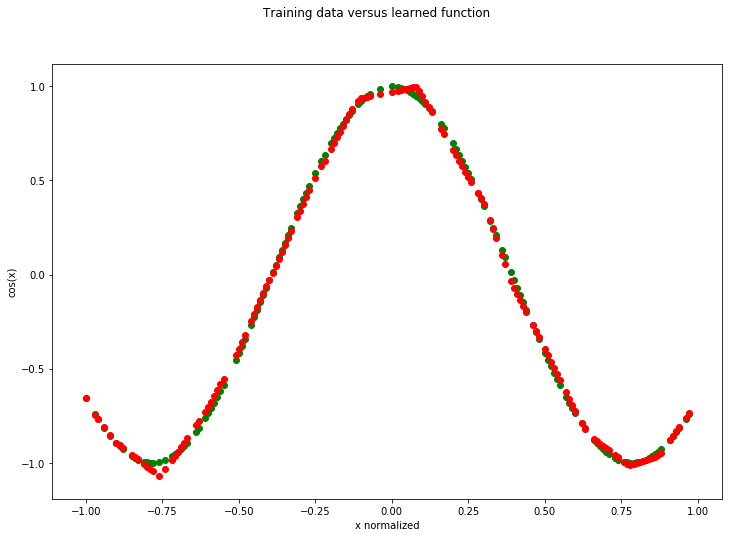

Best solution in generation 1929 has error 0.0724955270022
Best solution in generation 1929 has error 0.0724955270022
Best solution in generation 1930 has error 0.0724955270022
Best solution in generation 1930 has error 0.0724955270022
Best solution in generation 1931 has error 0.0724955270022
Best solution in generation 1931 has error 0.0724955270022
Best solution in generation 1932 has error 0.0724955270022
Best solution in generation 1932 has error 0.0724955270022
Best solution in generation 1933 has error 0.0724955270022
Best solution in generation 1933 has error 0.0724955270022
Best solution in generation 1934 has error 0.0724955270022
Best solution in generation 1934 has error 0.0724955270022
Best solution in generation 1935 has error 0.0724955270022
Best solution in generation 1935 has error 0.0724955270022
Best solution in generation 1936 has error 0.0724955270022
Best solution in generation 1936 has error 0.0724955270022
Best solution in generation 1937 has error 0.07249552700

In [ ]:
from IPython.display import clear_output

print 'Starting evolution'

best_score_per_generation = []

# Our main loop that does the evolution
for j in range(generations_max):
    # Evaluate the current generation
    for k in range(generation_size):
        current_generation[k]['sse'] = evaluate_neural_network(current_generation[k], x_training, y_training)
    # Sort by fitness
    sorted_by_fitness = sorted(current_generation, key=lambda k: k['sse'])

    # Print the best one
    print 'Best solution in generation', j, 'has error', sorted_by_fitness[0]['sse'].item(0)

    if j == generations_max-1 or (len(best_score_per_generation) > 0 and best_score_per_generation[-1] > sorted_by_fitness[0]['sse']):
        clear_output(wait=True)
        print 'Best solution in generation', j, 'has error', sorted_by_fitness[0]['sse'].item(0)
        if j == generations_max-1:
            print 'Evolution has finished'
        # Plot function currently learned
        fig = plt.figure(figsize=(12, 8))
        plt.scatter(x_training, y_training, color='green')
        plt.scatter(sorted_by_fitness[0]['input_output'][0], sorted_by_fitness[0]['input_output'][1], color='red')
        fig.suptitle('Training data versus learned function')
        plt.ylabel('cos(x)')
        plt.xlabel('x normalized')
        plt.show()
    else:
        print 'Best solution in generation', j, 'has error', sorted_by_fitness[0]['sse'].item(0)
        
    best_score_per_generation.append(sorted_by_fitness[0]['sse'].item(0))

    # Stop if we're close enough already
    if sorted_by_fitness[0]['sse'] < acceptable_error:
        print 'Done!'
        break

    # Create a new generation and make sure we hang onto the best solution so far
    new_generation = []
    new_generation.append(sorted_by_fitness[0])
    # Do breeding to create the next generation
    for l in range (1, generation_size):
        # Randomly pick mothers and fathers
        mother_index = 0
        father_index = 0
        while mother_index == father_index:
            mother_index = int(round((generation_size-1) * (random.random() * random.random())))
            father_index = int(round((generation_size-1) * random.random()))
        child = breed_neural_networks(sorted_by_fitness[mother_index], sorted_by_fitness[father_index])
        new_generation.append(child)
    current_generation = new_generation
print 'Evolution done'


In [140]:
print 'Starting test phase'

actual_output = []
# Let's test what we learned on the testing data
for i in range(len(x_testing)):
    input_value = x_testing[i]
    desired_output_value = y_testing[i]
    print("input value " + str(input_value) + " output value " + str(desired_output_value))
    result = run_neural_network([input_value], sorted_by_fitness[0])
    actual_output.append(result)
    print 'From X=',input_value,'we wanted',desired_output_value,'and got',actual_output[i].item(0)

Starting test phase
input value -0.95 output value -0.790967711914
From X= -0.95 we wanted -0.790967711914 and got -0.784000972526
input value 0.35 output value 0.1699671429
From X= 0.35 we wanted 0.1699671429 and got 0.166462330744
input value 0.18 output value 0.751805729141
From X= 0.18 we wanted 0.751805729141 and got 0.757403669361
input value 0.75 output value -0.9899924966
From X= 0.75 we wanted -0.9899924966 and got -0.96663570427
input value 0.89 output value -0.913737203142
From X= 0.89 we wanted -0.913737203142 and got -0.917400662004
input value 0.56 output value -0.620361612013
From X= 0.56 we wanted -0.620361612013 and got -0.61444084316
input value 0.64 output value -0.835588777131
From X= 0.64 we wanted -0.835588777131 and got -0.911927766553
input value -0.66 output value -0.876817890394
From X= -0.66 we wanted -0.876817890394 and got -0.835549217301
input value -0.26 output value 0.506220257233
From X= -0.26 we wanted 0.506220257233 and got 0.432581828253
input value 

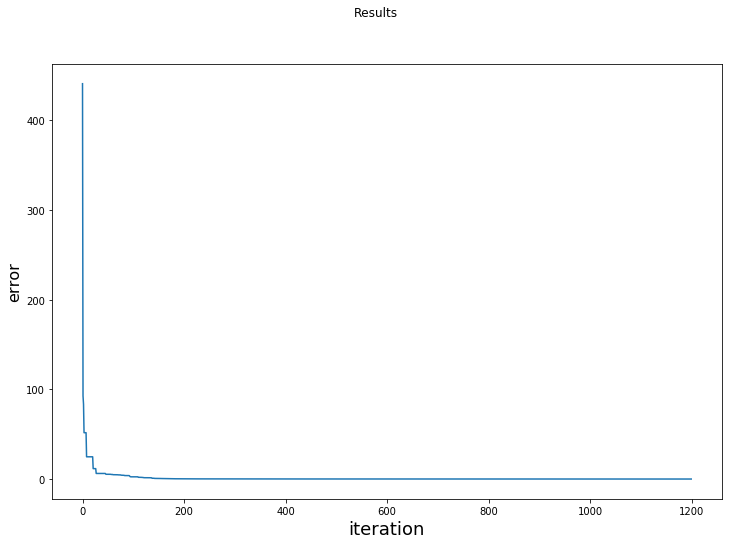

In [141]:
# Plot learning progress
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Results')
plt.plot(best_score_per_generation)
plt.xlabel('iteration', fontsize=18)
plt.ylabel('error', fontsize=16)
plt.show()

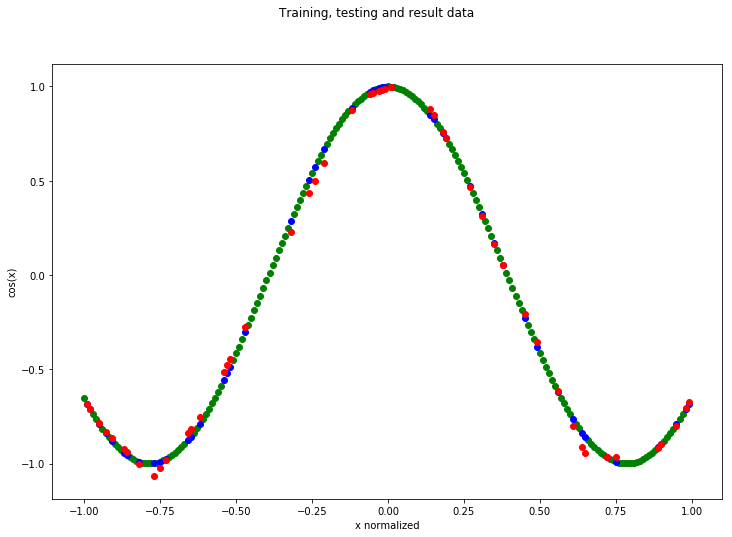

In [142]:
# Plot results vs "ground truth"
fig = plt.figure(figsize=(12, 8))

plt.scatter(x_training, y_training, color='green')
plt.scatter(x_testing, y_testing, color='blue')
plt.scatter(x_testing, actual_output, color='red')
fig.suptitle('Training, testing and result data')
plt.ylabel('cos(x)')
plt.xlabel('x normalized')
plt.show()
